<h1 align=center><font size = 7 color=#993399>Assignment</font></h1> 
<h2 align=center><font size = 6 color=#993399>Segmenting and Clustering Neighborhoods in Toronto</font></h2>  

## Introduction
 we will explore and cluster the neighborhoods in Toronto.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#item1">Creating a new Notebook</a></li>
        <li><a href="#item2">Scrape the web to obtain data</a></li>
        <li><a href="#item3">Dataframe creation</a></li>
        <li><a href="#item4">Link to Github</a></li>
    </ol>
</div>
<br>
<hr>

<a id='#item1'></a>

## 1. Create a notebook
__Start by creating a new Notebook for this assignment.__

<font color=blue>*>>This notebook is created and uploaded to Github.*</font>

<a id='#item2'></a>

## 2. Scrape the web to obtain data
__Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below: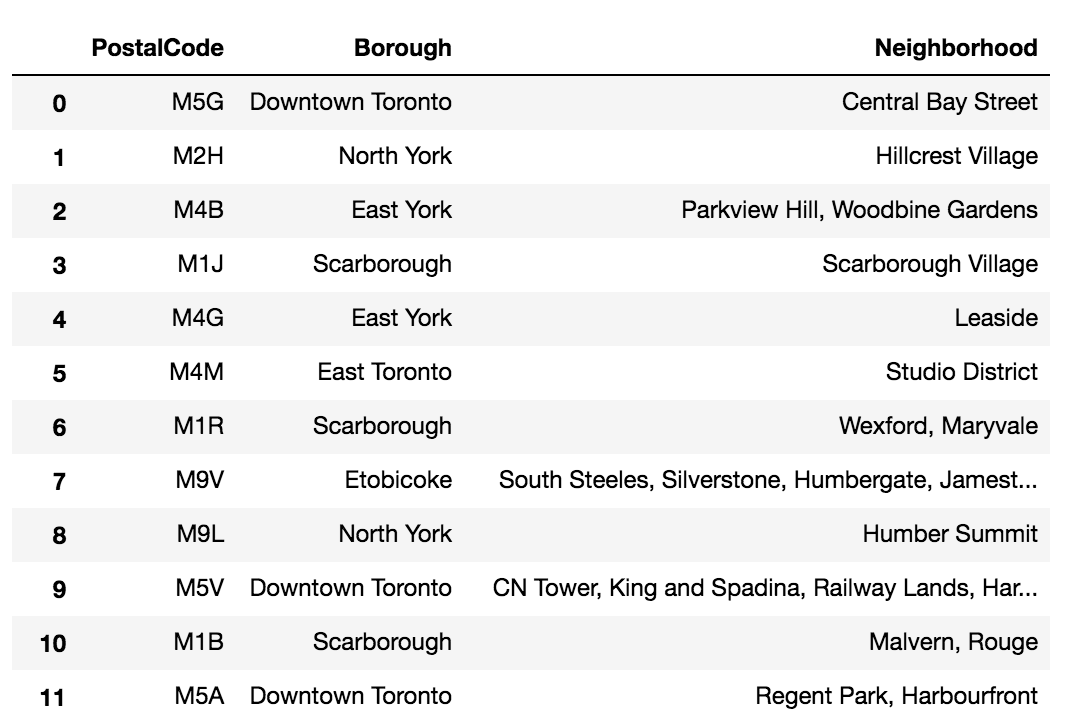__

<font color=blue>*>>Import all required libraries.*</font>

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url) # connect to website

# Check if Page is getting connected
try:
    page = urllib.request.urlopen(url)
    print("Page loaded successfully.")
except:
    print("An error occured.")
    
soup = BeautifulSoup(page, 'lxml')# to parse the html page
print(soup) #check page

Page loaded successfully.
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XowNfgpAICEAAJb@VM8AAAAI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":949497198,"wgRevisionId":949497198,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto",

we can see the html page is loaded correctly.
Now we get the table part. it is saved as class 'wikitable'

In [3]:
tabledata = soup.find(class_='wikitable')# get 'wikitable'
print(str(tabledata)[0:158])# check to see the table data (only first few characters)

<table class="wikitable">
<tbody><tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td>


The table is encoded as:
* Each row is between " 'tr' row1 '/tr' "
* Each cell in row is between " 'td' cell 'td' "
* The header cells are between " 'th' header cell '/th' "
We seperate it save it as a list of lists.

In [4]:
tableList = [[celldata.text.rstrip() for celldata in rowdata.find_all(["th","td"])]
                        for rowdata in tabledata.find_all("tr")]
tableList[0:10] # print the first 10 rows to check

[['Postal code', 'Borough', 'Neighborhood'],
 ['M1A', 'Not assigned', ''],
 ['M2A', 'Not assigned', ''],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Regent Park / Harbourfront'],
 ['M6A', 'North York', 'Lawrence Manor / Lawrence Heights'],
 ['M7A', 'Downtown Toronto', "Queen's Park / Ontario Provincial Government"],
 ['M8A', 'Not assigned', ''],
 ['M9A', 'Etobicoke', 'Islington Avenue']]

The First Row is the header, the rest rows are data.

<a id='#item3'></a>

## 3. DataFrame Creation
To create the above dataframe:
* __The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood__

In [5]:
postal_df=pd.DataFrame(tableList[1:],columns =tableList[0])
postal_df.head() # to see the first few rows of dataframe

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


* __Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.__

In [6]:
postal_df=postal_df[postal_df['Borough'] != 'Not assigned']#Ignore cells with a borough that is Not assigned.
postal_df.shape

(103, 3)

* __More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.__

In [7]:
#Check to see if the unique groups are same as orginal table
postal_df.groupby('Postal code').count().shape

(103, 2)

Since the number of rows of groupby 'Postal code' and original table are same. we can conclude there are no duplictaes in 'Postal code' column.  However multiple neighborhood in the column are seperated by '/' inst

In [8]:
postal_df['Neighborhood'].str.replace(' /',",")

2                                              Parkwoods
3                                       Victoria Village
4                              Regent Park, Harbourfront
5                       Lawrence Manor, Lawrence Heights
6            Queen's Park, Ontario Provincial Government
                             ...                        
160       The Kingsway, Montgomery Road , Old Mill North
165                                 Church and Wellesley
168                Business reply mail Processing CentrE
169    Old Mill South, King's Mill Park, Sunnylea, Hu...
178    Mimico NW, The Queensway West, South of Bloor,...
Name: Neighborhood, Length: 103, dtype: object

* __If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.__

In [9]:
postal_df[(postal_df['Neighborhood'] == '') | (postal_df['Neighborhood']=='Not assigned')].shape

(0, 3)

Since number of rows is 0 there are no empty cells in neighborhood column

* __Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.__

In [10]:
# done

* In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [11]:
print('Shape of dataframe is', postal_df.shape)

Shape of dataframe is (103, 3)


<a id='#item4'></a>

## 4. Link to Github
Submit a link to your Notebook on your Github repository.  
  
<font color=blue>*>>This notebook is created and uploaded to Github.*</font>